In [14]:
import pandas as pd
import numpy as np

data=pd.read_csv("C:\\Users\\User\\Downloads\\cars.csv")

In [15]:
data

,Unnamed: 0,Category,Make,Model,Year,price,color,Country,transmission,wheel_drive,status,Dealer,Mileage
0,0,Van/Minivan,GMC,Savana 2500 Passenger,2008,2006.0000,White,Austria,semiauto,fwd,live,Dealer2,129307
1,1,Sedan,Oldsmobile,Cutlass,1999,41993.7000,White,Austria,manual,rwd,live,Dealer3,142270
2,2,Sedan,Chevrolet,Impala,2008,13239.1000,Electric Blue,France,manual,awd,live,Dealer9,212386
3,3,SUV,BMW,X5,2017,165183.9800,Silver,Austria,auto,awd,live,Dealer3,163785
4,4,Sedan,Volkswagen,Jetta III,1993,130277.0469,White,France,auto,rwd,removed,Dealer1,119862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,Sedan,Lincoln,MKZ,2007,19268.9000,Violet,Austria,auto,awd,live,Dealer7,69249
49996,49996,SUV,Cadillac,Escalade ESV,2016,30392.8800,Blue,Italy,semiauto,rwd,removed,Dealer7,89726
49997,49997,Pickup,Honda,Ridgeline,2018,103550.2000,Blue,Italy,auto,fwd,removed,Dealer7,124296
49998,49998,Sedan,Acura,TSX,2006,46988.7600,Blue,Greece,auto,fwd,live,Dealer10,212823


In [16]:
##### Clean / validate dataset #####
#####       steps              #####
# -remove first column
# -check for missing values
# -check for duplicates
# -validate data type per column

# -remove first column
data = data.iloc[:,1:]
data


,Category,Make,Model,Year,price,color,Country,transmission,wheel_drive,status,Dealer,Mileage
0,Van/Minivan,GMC,Savana 2500 Passenger,2008,2006.0000,White,Austria,semiauto,fwd,live,Dealer2,129307
1,Sedan,Oldsmobile,Cutlass,1999,41993.7000,White,Austria,manual,rwd,live,Dealer3,142270
2,Sedan,Chevrolet,Impala,2008,13239.1000,Electric Blue,France,manual,awd,live,Dealer9,212386
3,SUV,BMW,X5,2017,165183.9800,Silver,Austria,auto,awd,live,Dealer3,163785
4,Sedan,Volkswagen,Jetta III,1993,130277.0469,White,France,auto,rwd,removed,Dealer1,119862
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Sedan,Lincoln,MKZ,2007,19268.9000,Violet,Austria,auto,awd,live,Dealer7,69249
49996,SUV,Cadillac,Escalade ESV,2016,30392.8800,Blue,Italy,semiauto,rwd,removed,Dealer7,89726
49997,Pickup,Honda,Ridgeline,2018,103550.2000,Blue,Italy,auto,fwd,removed,Dealer7,124296
49998,Sedan,Acura,TSX,2006,46988.7600,Blue,Greece,auto,fwd,live,Dealer10,212823


In [17]:
# check for missing values
print(data.isna().any()) #"price" seems to have missing values

price_mv=data[data['price'].isnull()].index.tolist() #find index of missing values
print('\n')
print('missing prices: ',price_mv)

data=data.drop(price_mv) #remove rows with missing prices
print('\n')
print(len(price_mv), 'rows dropped')

Category        False
Make            False
Model           False
Year            False
price            True
color           False
Country         False
transmission    False
wheel_drive     False
status          False
Dealer          False
Mileage         False
dtype: bool


missing prices:  [296, 757, 2078, 2491, 2627, 2665, 2934, 3540, 5313, 6522, 6595, 6721, 6870, 7587, 7776, 9595, 10307, 10684, 12360, 13476, 14610, 15278, 16335, 16997, 17644, 18320, 18943, 21279, 21708, 24310, 25103, 27756, 27980, 28437, 29275, 30371, 30555, 31037, 34618, 35178, 36524, 37476, 37662, 37714, 38120, 38341, 38458, 39052, 39125, 40492, 40631, 41153, 41257, 41971, 42961, 44145, 44491, 44558, 44683, 45412, 47099, 47293, 47749, 48377, 48390, 48512, 49280]


67 rows dropped


In [18]:
# -check for duplicates
dups=data[data.duplicated()]
print("duplicate rows: ", "\n", dups)

data=data.drop_duplicates(keep='first')
print("\n", len(data), "Unique rows remaining for our dataset")

duplicate rows:  
            Category     Make         Model  Year       price           color  \
302    Wagon, Sedan    Volvo           850  1996   15675.100   Electric Blue   
303     Van/Minivan    Dodge  Ram Van 1500  2001    1999.000          Silver   
304     Convertible  Ferrari    488 Spider  2017   26510.000           White   
342    Wagon, Sedan    Volvo           850  1996   15675.100   Electric Blue   
343     Van/Minivan    Dodge  Ram Van 1500  2001    1999.000          Silver   
344     Convertible  Ferrari    488 Spider  2017   26510.000           White   
368    Wagon, Sedan    Volvo           850  1996   15675.100   Electric Blue   
369     Van/Minivan    Dodge  Ram Van 1500  2001    1999.000          Silver   
370     Convertible  Ferrari    488 Spider  2017   26510.000           White   
49361           SUV    Lexus            RX  2017   88429.000          Orange   
49578           SUV   Toyota       4Runner  2010  162246.760   Electric Blue   
49579         Wagon  

In [19]:
# -validate data type per column 
# (for example: make sure that column 'year' has no value like 'black, 22.8')
print("Unique values for 'category': ", '\n', data['Category'].unique()) #ok #if 'SUV2020' and 'SUV1992' are valid categories
                                                                             #which they seem to be (?)
print('\n', "Unique values for 'make': ", '\n', data['Make'].unique()) #ok
print('\n', "Unique values for 'model': ", '\n', data['Model'].unique()) #needs further analysis
print('\n', "Unique values for 'year': ", '\n', data['Year'].unique()) #ok
print('\n', "Unique values for 'color': ", '\n', data['color'].unique()) #ok #'british racing' is a valid color
print('\n', "Unique values for 'country': ", '\n', data['Country'].unique()) #ok
print('\n', "Unique values for 'transmission': ", '\n', data['transmission'].unique()) #ok
print('\n', "Unique values for 'wheel_drive': ", '\n', data['wheel_drive'].unique()) #ok
print('\n', "Unique values for 'status': ", '\n', data['status'].unique()) #ok
print('\n', "Unique values for 'dealer': ", '\n', data['Dealer'].unique()) #ok


print('\n', 'data type for column "price": ', data['price'].dtypes) #ok (no strings)
print('\n', 'data type for column "mileage": ', data['Mileage'].dtypes) #ok (no strings)
print('\n', 'data type for column "model": ', data['Model'].dtypes) #needs further analysis

counter=0
for i in range(len(data)):
    if isinstance(data['Model'].iloc[i] , str): counter+=1
if counter==len(data): print("'Model' column is valid, no non-string values") #ok

Unique values for 'category':  
 ['Van/Minivan' 'Sedan' 'SUV' 'Wagon, Sedan' 'Hatchback, Convertible'
 'Pickup' 'Hatchback' 'Coupe' 'Coupe, Sedan' 'Coupe, Convertible'
 'Convertible, Coupe' 'Sedan, Coupe, Wagon' 'Wagon' 'Convertible'
 'Coupe, Convertible, Hatchback' 'Hatchback, Sedan'
 'Sedan, Coupe, Convertible' 'Sedan, Wagon' 'Sedan, Hatchback'
 'Coupe, Convertible, Sedan, Wagon' 'Sedan, Coupe' 'Coupe, Sedan, Wagon'
 'Wagon, Convertible' 'Coupe, Wagon, Sedan' 'Convertible, Hatchback'
 'Hatchback, Coupe, Convertible' 'Sedan, Convertible'
 'Convertible, Sedan, Coupe' 'Coupe, Sedan, Hatchback'
 'Sedan, Hatchback, Wagon' 'SUV, Pickup' 'Wagon, Convertible, Sedan'
 'Convertible, Sedan, Wagon' 'SUV, Wagon' 'Hatchback, Sedan, Coupe'
 'Wagon, Sedan, Coupe' 'Convertible, Coupe, Sedan'
 'Sedan, Wagon, Hatchback' 'Coupe, Hatchback, Sedan' 'Wagon, SUV'
 'Sedan, Convertible, Coupe' 'Coupe, Convertible, Wagon, Sedan'
 'Coupe, Sedan, Convertible' 'Hatchback, Sedan, Wagon'
 'Coupe, Hatchback, Convert

New numerical / categorical dataset: 

        Category  Make   Model  Year        price  color  Country  \
0          68.0  19.0   900.0  2008    2006.0000   10.0      0.0   
1          47.0  44.0   295.0  1999   41993.7000   10.0      0.0   
2          47.0   8.0   528.0  2008   13239.1000    5.0      1.0   
3          42.0   4.0  1136.0  2017  165183.9800    8.0      0.0   
4          47.0  59.0   547.0  1993  130277.0469   10.0      1.0   
...         ...   ...     ...   ...          ...    ...      ...   
49995      47.0  33.0   607.0  2007   19268.9000    9.0      0.0   
49996      42.0   7.0   370.0  2016   30392.8800    1.0      4.0   
49997      41.0  23.0   839.0  2018  103550.2000    1.0      4.0   
49998      47.0   0.0  1033.0  2006   46988.7600    1.0      3.0   
49999      41.0  12.0   795.0  2009   77410.9000    4.0      2.0   

       transmission  wheel_drive  status  Dealer  Mileage  
0               2.0          1.0     0.0     2.0  23304.0  
1               1.0    

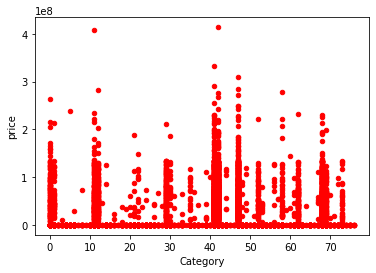

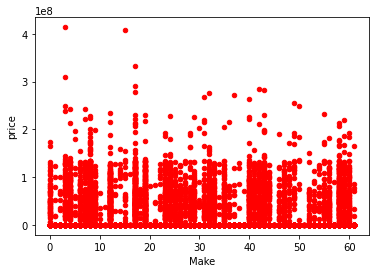

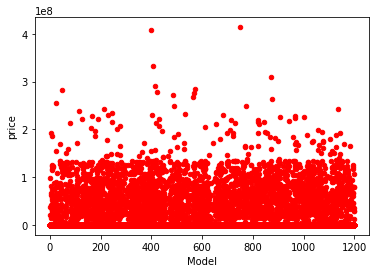

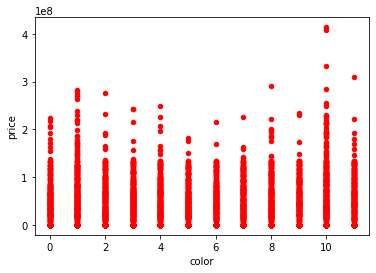

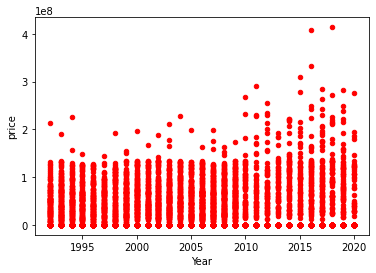

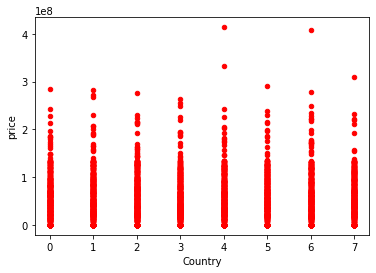

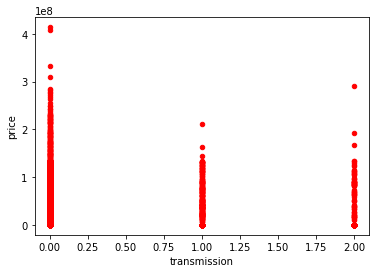

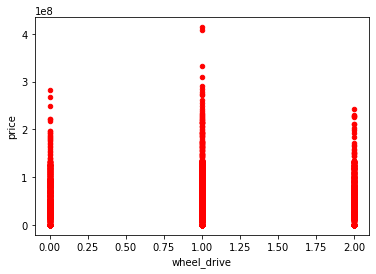

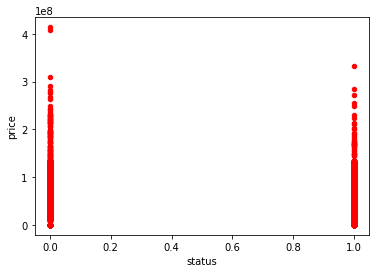

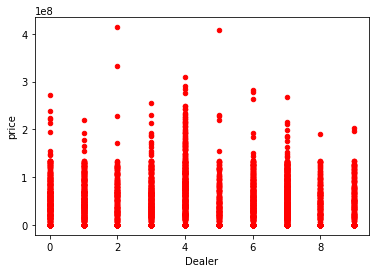

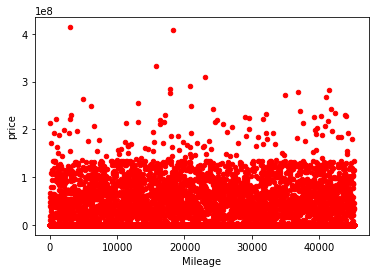

In [20]:
##### Correlations #####
from sklearn.preprocessing import OrdinalEncoder


# to find correlations, we need to turn strings to numeric
# we store the results to a new dataframe called numeric_data
# for example, if 'country' has values ['England', 'Greece', 'England', 'Austria', 'Greece'], it becomes [0, 1, 0, 2, 1]
numeric_data=data
ord_enc = OrdinalEncoder()
class_names=['Category', 'Make', 'Model', 'color', 'Country', 'transmission', 'wheel_drive', 'status', 'Dealer', 'Mileage']
for i in class_names: numeric_data[i]=ord_enc.fit_transform(numeric_data[[i]])
print("New numerical / categorical dataset: \n\n", numeric_data, "\n\n\n")


print("Correlation between price and category:", numeric_data['price'].corr(numeric_data['Category']), "\n")
print("Correlation between price and make:", numeric_data['price'].corr(numeric_data['Make']), "\n")
print("Correlation between price and model:", numeric_data['price'].corr(numeric_data['Model']), "\n")
print("Correlation between price and color:", numeric_data['price'].corr(numeric_data['color']), "\n")
print("Correlation between price and year:", numeric_data['price'].corr(numeric_data['Year']), "\n")
print("Correlation between price and country:", numeric_data['price'].corr(numeric_data['Country']), "\n")
print("Correlation between price and transmission:", numeric_data['price'].corr(numeric_data['transmission']), "\n")
print("Correlation between price and wheel drive:", numeric_data['price'].corr(numeric_data['wheel_drive']), "\n")
print("Correlation between price and status:", numeric_data['price'].corr(numeric_data['status']), "\n")
print("Correlation between price and dealer:", numeric_data['price'].corr(numeric_data['Dealer']), "\n")
print("Correlation between price and mileage:", numeric_data['price'].corr(numeric_data['Mileage']), "\n\n\n")

ax1 = numeric_data.plot.scatter(x='Category',y='price',c='red')
ax2 = numeric_data.plot.scatter(x='Make',y='price',c='red')
ax3 = numeric_data.plot.scatter(x='Model',y='price',c='red')
ax4 = numeric_data.plot.scatter(x='color', y='price', c='red')
ax5 = numeric_data.plot.scatter(x='Year',y='price', c='red')
ax6 = numeric_data.plot.scatter(x='Country',y='price', c='red')
ax7 = numeric_data.plot.scatter(x='transmission',y='price',c='red')
ax8 = numeric_data.plot.scatter(x='wheel_drive',y='price',c='red')
ax9 = numeric_data.plot.scatter(x='status',y='price',c='red')
ax10 = numeric_data.plot.scatter(x='Dealer',y='price', c='red')
ax11 = numeric_data.plot.scatter(x='Mileage',y='price',c='red')

###################
### CONCLUSION FOR CORRELATIONS ###
# There are no strong correlations between price and any given variable / feature in this dataset
###################

Overview of price:  



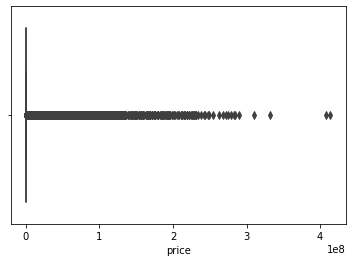

In [21]:
##### Outliers #####
#outliers concern numerical values
#our two numerical values are price and mileage

import matplotlib.pyplot as plt
import seaborn as sns

print("Overview of price: ", "\n")
ax1=sns.boxplot(x=data['price'])


Overview of mileage:  



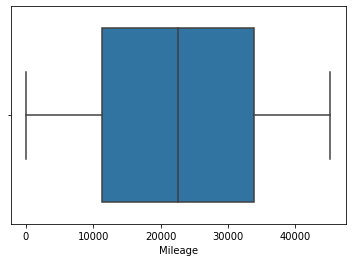

In [22]:
print("Overview of mileage: ", "\n")
ax2=sns.boxplot(x=data['Mileage'])



<BarContainer object of 7 artists>

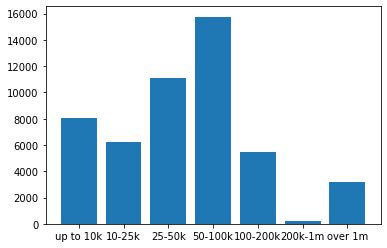

In [23]:
import matplotlib.pyplot as plt

df=data['price']
k_10=df[df<10000].count()
k_25=df[df<25000].count()-k_10
k_50=df[df<50000].count()-k_25-k_10
k_100=df[df<100000].count()-k_50-k_25-k_10
k_200=df[df<200000].count()-k_100-k_50-k_25-k_10
k_1000=df[df<1000000].count()-k_200-k_100-k_50-k_25-k_10
k_over=len(df)-k_1000-k_200-k_100-k_50-k_25-k_10

dff={ "up to 10k":k_10, "10-25k":k_25, '25-50k':k_50, '50-100k':k_100 , '100-200k':k_200, '200k-1m': k_1000, 'over 1m':k_over}

keys = dff.keys()
values = dff.values()

plt.bar(keys, values)

In [ ]:
### CONCLUSION FOR OUTLIERS:
# It depends.
# If we want to build a ML model to predict the price of cars, I would remove some percentage of the outliers,
# but I would still keep some, for better generalization purposes
# If this dataset is representative of our clientele, there is no reason to remove any data,
# except maybe trace it and inform the owner